In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:

stoc = yf.Ticker("HDFCBANK.NS")
hist = stoc.history(period="1mo", interval="1h", actions=False)
hist = hist.reset_index()
x = hist["Datetime"]
for i in range(len(x)):
    x[i] = x[i].strftime("%d%m%Y%H%M")
hist["change"] = hist.apply(lambda row: 1 if row["Close"] > row["Open"] else 0, axis=1)
# hist
# df = hist[["Datetime", "change"]]
df = hist
df

C:\Users\anand\AppData\Local\Temp\ipykernel_19396\2661248710.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = x[i].strftime("%d%m%Y%H%M")


,Datetime,Open,High,Low,Close,Volume,change
0,080320230915,1623.550049,1639.500000,1621.050049,1635.650024,0,1
1,080320231015,1635.949951,1636.000000,1627.000000,1627.300049,1391150,0
2,080320231115,1627.000000,1629.550049,1621.000000,1621.900024,1654036,0
3,080320231215,1622.050049,1628.849976,1621.800049,1625.349976,2103264,1
4,080320231315,1625.349976,1632.099976,1624.449951,1630.199951,745443,1
...,...,...,...,...,...,...,...
135,060420231115,1658.349976,1663.900024,1656.099976,1658.599976,4717126,1
136,060420231215,1658.550049,1660.500000,1655.099976,1656.900024,2697771,0
137,060420231315,1656.900024,1662.300049,1655.500000,1660.949951,5300512,1
138,060420231415,1660.949951,1669.199951,1660.500000,1665.500000,3346263,1


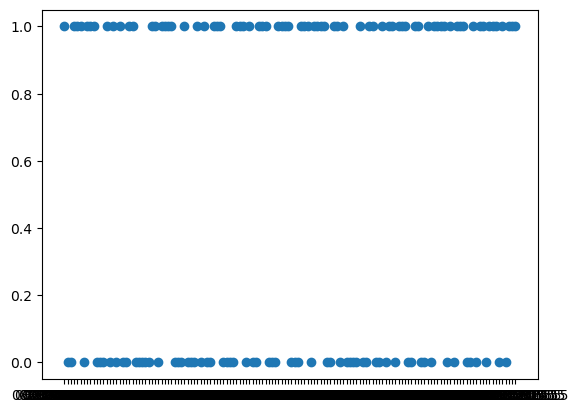

In [75]:
# plt.plot(df["Datetime"], df["change"]*1500)
# plt.plot(df["Datetime"], df["Close"])
plt.scatter(df["Datetime"], df["change"])
plt.show()

In [77]:
x = df.drop(["change"], axis=1)
y = df["change"]

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=69) #50% test data as smaller dataset

In [96]:
# x_train,x_test
# y_train,y_test

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) #fitting the training data because random_state is set to 69 im not exactly sure about that once verify when checking this again
x_test_scaled = scaler.transform(x_test)
#here we are not fitting the test data as we want to use the same mean and standard deviation as the training data 

In [103]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(random_state=0).fit(x_train_scaled, y_train)
lor.predict(x_train_scaled)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [104]:
lor.score(x_train_scaled, y_train)

0.8142857142857143

In [106]:
lor.score(x_test_scaled, y_train)

0.5571428571428572

the model isnt good

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lor = LogisticRegression(random_state=0,C=1,fit_intercept=True).fit(x_train_scaled, y_train)

In [111]:
lor.score(x_train_scaled, y_train), lor.score(x_test_scaled, y_test)

(0.8061224489795918, 0.8809523809523809)

test3 the above model is working fine but this next test model is just without using scaling

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
lor = LogisticRegression(random_state=0,C=1,fit_intercept=True).fit(x_train, y_train)
lor.score(x_train, y_train), lor.score(x_test, y_test)

(0.5408163265306123, 0.5238095238095238)

without even training test now

In [113]:
lor.score(x, y)

0.5357142857142857

keeping test size 0.5

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
lor = LogisticRegression(random_state=0,C=1,fit_intercept=True).fit(x_train, y_train) #default for c is usually 0.01
lor.score(x_train, y_train), lor.score(x_test, y_test)

(0.5714285714285714, 0.39285714285714285)